# Classification Evaluation Metrics


Here we are specifically talking about binary classification. but the concepts mentioned can be applied to multiclass classification also.

## References 

- https://en.wikipedia.org/wiki/Confusion_matrix
- https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers
- https://en.wikipedia.org/wiki/Sensitivity_and_specificity
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             precision_recall_curve, roc_auc_score, roc_curve,
                             RocCurveDisplay, ConfusionMatrixDisplay, confusion_matrix,
                             f1_score, PrecisionRecallDisplay, auc, classification_report)

## Condition Positive

The number of real positive cases in the data.

## Condition Negative

The number of real negative cases in the data.

## Confusion Matrix

Sometimes referred as error matrix, it allows us to visualize performance of the machine learning.
it is a matrix that shows comparison between actual values and predicted values.

One general understanding for confusion matrix

```
                     Predicted Values ->|      Positive      |       Negative     |
            ----------------------------|--------------------|--------------------|
            Actual Values -> | Positive | True Positive(TP)  | False Negative(FN) |
                             | Negative | False Positive(FP) | True Negative(TN)  |
```

In [12]:
y_true = np.array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0])
y_pred = np.array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1])

confusion_mat = confusion_matrix(y_true, y_pred)
confusion_mat

array([[3, 2],
       [1, 4]])

understandably 3 correct 0s, 4 correct 1s and then the wrong ones.
2 false 1s and 1 false 0.

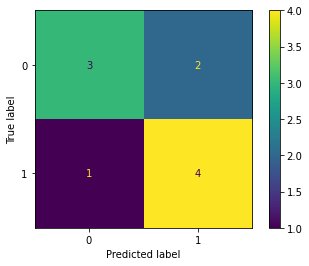

In [13]:
ConfusionMatrixDisplay(confusion_mat).plot()
plt.show()

When we are talking about TP, FP, FN, FP these are relative terms/ conditions in the sense of labels. when we are talking about label 1 then the matrix above looks like this

```
    TN     FP
    
    FN     TP
```
    

In [14]:
tn1, fp1, fn1, tp1 = confusion_mat.ravel()
tn1, fp1, fn1, tp1

(3, 2, 1, 4)

or if we are talking about label 0 then

```
    TP    FN
    
    FP    TN
```

In [15]:
tp0, fn0, fp0, tn0 = confusion_mat.ravel()
tp0, fn0, fp0, tn0

(3, 2, 1, 4)

## Accuracy

As the name suggests how accurate the predicted results are.

\begin{align}
    accuracy &= \frac{TP + TN}{TP + FP + TN + FN}
\end{align}

accuracy is not dependent on label.

In [16]:
y_true, y_pred

(array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0]), array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1]))

In [17]:
accuracy_score(y_true, y_pred)

0.7

In [18]:
(tp0 + tn0) / (tp0 + fp0 + tn0 + fn0)

0.7

In [19]:
(tp1 + tn1) / (tp1 + fp1 + tn1 + fn1)

0.7

## Precision 

- it shows how precise we are in our results.
- by definition in all the predicted values, how many of them actually have correct values.

\begin{align}
    precision = \frac{TP}{TP + FP}
\end{align}

In [30]:
y_true, y_pred

(array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0]), array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1]))

In [20]:
precision_score(y_true, y_pred, pos_label=1)

0.6666666666666666

In [21]:
tp1 / (tp1 + fp1)

0.6666666666666666

In [22]:
precision_score(y_true, y_pred, pos_label=0)

0.75

In [23]:
tp0 / (tp0 + fp0)

0.75

## Recall / Sensitivity / True Positive Rate (TPR) / Hit Rate

- it shows how many of the correct values we can recall.
- by definition how many correct values the model can recall.

\begin{align}
    recall = \frac{TP}{TP + FN}
\end{align}

In [31]:
y_true, y_pred

(array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0]), array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1]))

In [32]:
recall_score(y_true, y_pred, pos_label=1)W

0.8

In [33]:
tp1 / (tp1 + fn1)

0.8

In [34]:
recall_score(y_true, y_pred, pos_label=0)

0.6

In [35]:
tp0 / (tp0 + fn0)

0.6

## F1-score

\begin{align}
    F1 &= \frac{2}{\frac{1}{P} + \frac{1}{R}}\\
    F1 &= \frac{2  P  R}{P + R}\\
    F1 &= \frac{2 TP}{2TP + FP + FN}
\end{align}

In [36]:
y_true, y_pred

(array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0]), array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1]))

In [37]:
f1_score(y_true, y_pred, pos_label=1)

0.7272727272727272

In [38]:
f1_score(y_true, y_pred, pos_label=0)

0.6666666666666665

## Classification Report

Novelty from Scikit-Learn

In [39]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



## Specificity / Selectvity / True Negative Rate (TNR)

\begin{align}
    specificity &= \frac{TN}{TN + FP}
\end{align}

In [40]:
tn0 / (tn0 + fp0)

0.8

In [41]:
tn1 / (tn1 + fp1)

0.6

## Fall out / False Positive Rate (FPR)

\begin{align}
    FPR = \frac{FP}{FP + TN}
\end{align}

In [42]:
fp0 / (fp0 + tn0)

0.2

In [43]:
fp1 / (fp1 + tn1)

0.4

## Miss rate / False Negative Rate (FNR)

\begin{align}
    FNR = \frac{FN}{FN + TP}
\end{align}

In [44]:
fn0 / (fn0 + tp0)

0.4

In [45]:
fn1 / (fn1 + tp1)

0.2

## PRC (Precision-Recall Curve)

In [46]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

mat_x, mat_y = make_classification(n_samples=1000)

mat_x.shape, mat_y.shape

estimator = LogisticRegression()
estimator.fit(mat_x, mat_y)
pred_y = estimator.predict(mat_x)

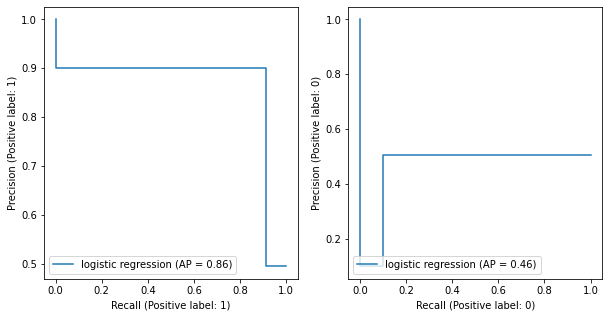

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

PrecisionRecallDisplay.from_predictions(mat_y, pred_y, name='logistic regression', pos_label=1, ax=ax[0])
PrecisionRecallDisplay.from_predictions(mat_y, pred_y, name='logistic regression', pos_label=0, ax=ax[1])

plt.show()

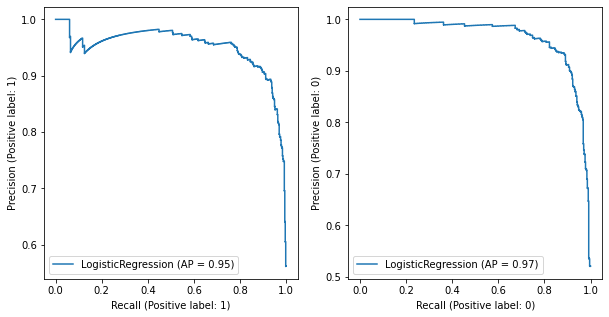

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

PrecisionRecallDisplay.from_estimator(estimator, mat_x, mat_y, pos_label=1, ax=ax[0])
PrecisionRecallDisplay.from_estimator(estimator, mat_x, mat_y, pos_label=0, ax=ax[1])

plt.legend(loc='best')
plt.show()

In [49]:
precision, recall, threshold = precision_recall_curve(y_true=mat_y, probas_pred=pred_y,
                                                      pos_label=1)

auc(recall, precision)

0.9276553559547571

In [50]:
precision, recall, threshold = precision_recall_curve(y_true=mat_y, probas_pred=pred_y,
                                                      pos_label=0)

auc(recall, precision)

0.3269051500958479

## ROC (Receiver Operating Characteristic Curve)

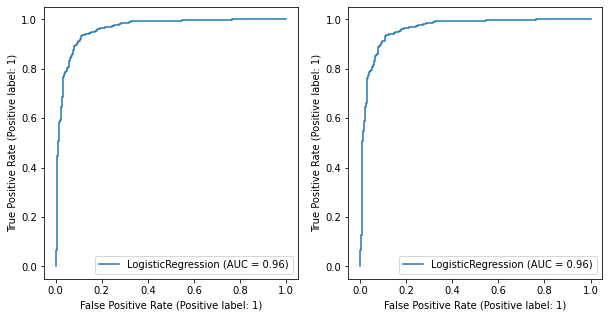

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

RocCurveDisplay.from_estimator(estimator, mat_x, mat_y, pos_label=1, ax=ax[0])
RocCurveDisplay.from_estimator(estimator, mat_x, mat_y, pos_label=1, ax=ax[1])

plt.legend(loc='best')
plt.show()


In [52]:
roc_auc_score(mat_y, pred_y)

0.906050605060506